### Exercise 5


# Identification of Areas with Increased Intensity of Recorded Offenses in the City of Kraków








In [4]:
punkty <- st_read("C:/Users/Dell/OneDrive/Pulpit/PROJEKTY/-Spatial-Data-Analysis-in-R/data/zestaw2_XYTableToPoi_Project.shp")


Reading layer `zestaw2_XYTableToPoi_Project' from data source 
  `C:\Users\Dell\OneDrive\Pulpit\PROJEKTY\-Spatial-Data-Analysis-in-R\data\zestaw2_XYTableToPoi_Project.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 2000 features and 2 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 7415455 ymin: 5539046 xmax: 7438286 ymax: 5553671
Projected CRS: ETRS89 / Poland CS2000 zone 7


In [5]:
osiedle<-st_read("C:/Users/Dell/OneDrive/Pulpit/PROJEKTY/-Spatial-Data-Analysis-in-R/data/osiedla.shp")


Reading layer `osiedla' from data source 
  `C:\Users\Dell\OneDrive\Pulpit\PROJEKTY\-Spatial-Data-Analysis-in-R\data\osiedla.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 141 features and 30 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 7413437 ymin: 5537344 xmax: 7443955 ymax: 5555031
Projected CRS: ETRS89 / Poland CS2000 zone 7


In [7]:
coordinates_punkty <- st_coordinates(punkty)


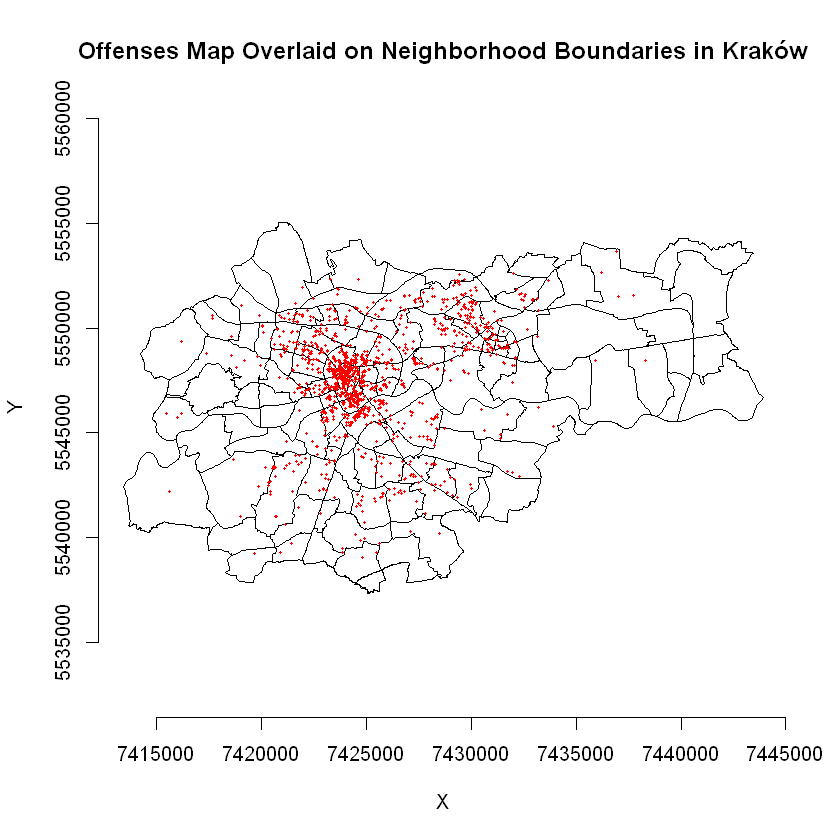

In [8]:
# Displaying the Offenses Map Overlaid on the Neighborhood Boundaries of Kraków
plot(osiedle$geometry, main = "Offenses Map Overlaid on Neighborhood Boundaries in Kraków", 
     col = NA, border = "black", asp = 1, xlab = "X", ylab = "Y")
points(coordinates_punkty[, 1], coordinates_punkty[, 2], col = "red", pch = 19, cex = 0.3)
axis(1)  # X-axis
axis(2)  # Y-axis


# DBSCAN

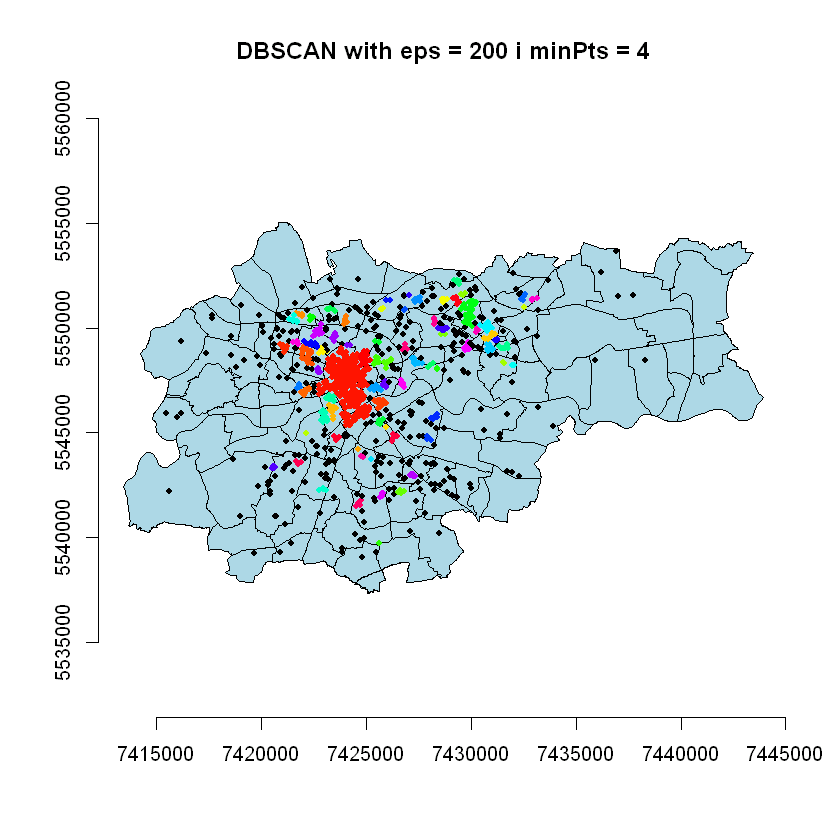

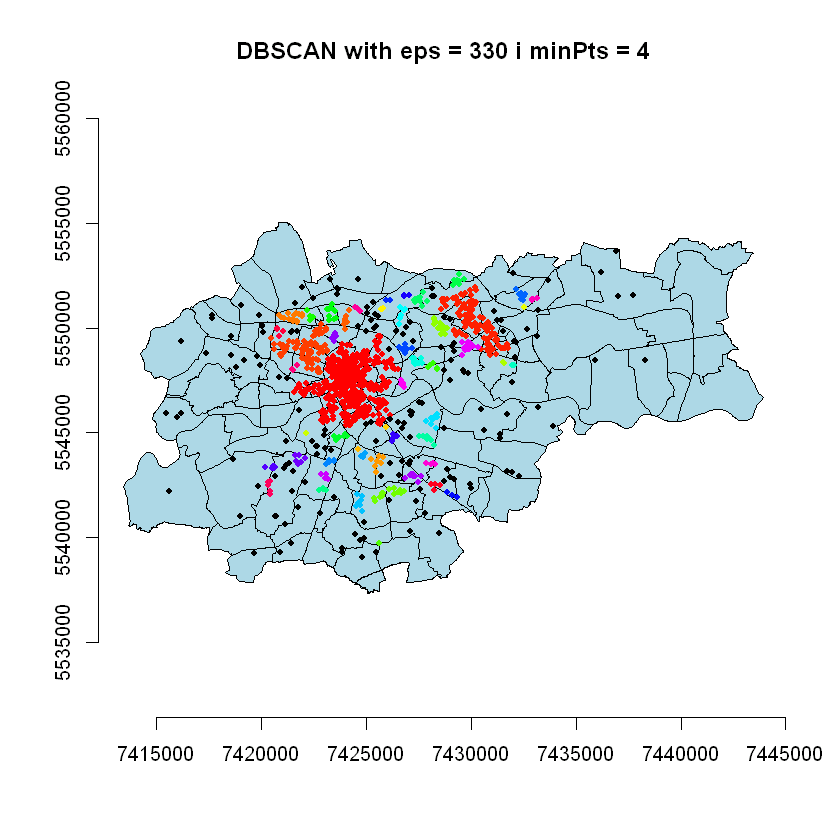

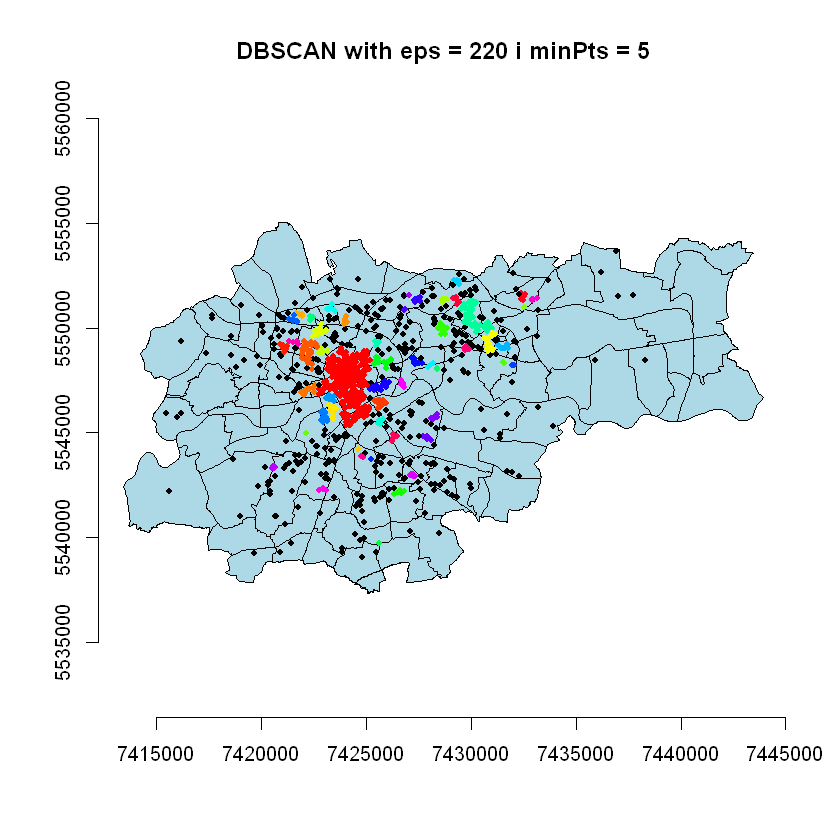

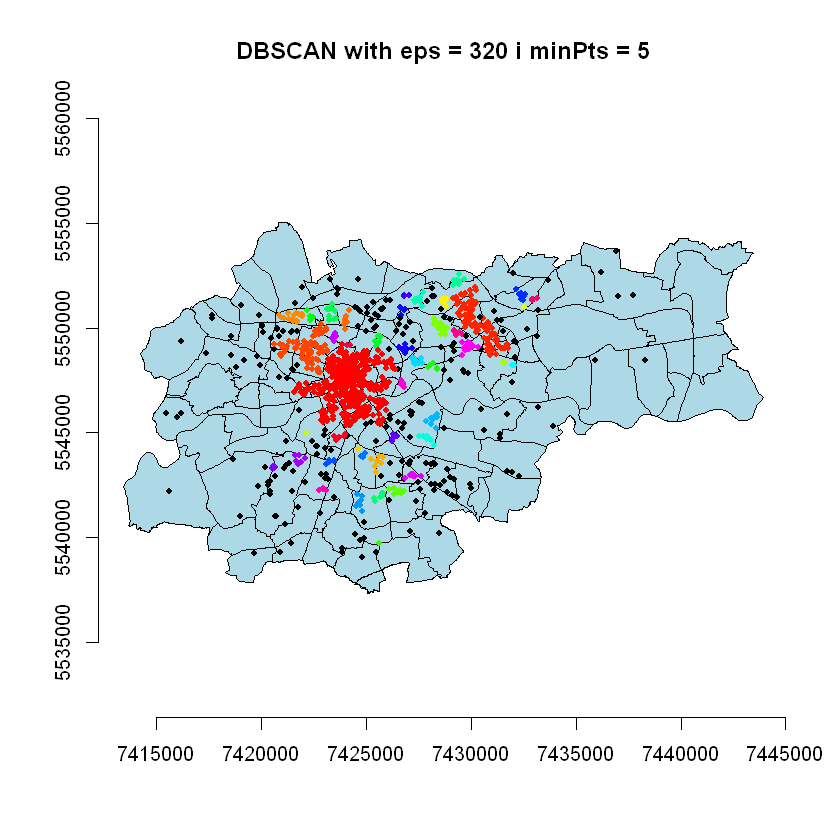

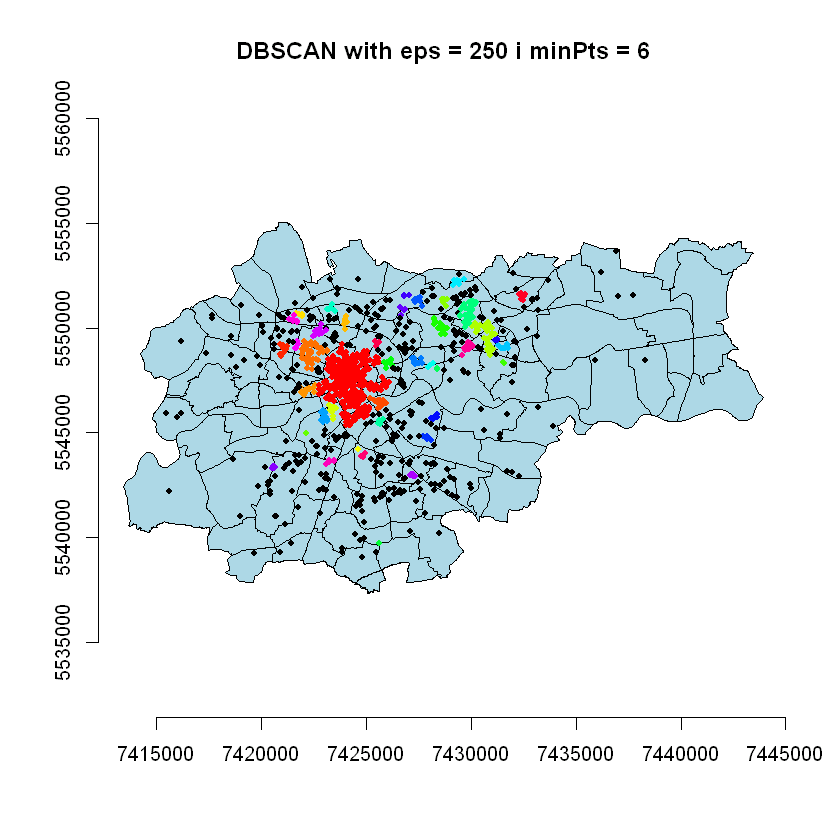

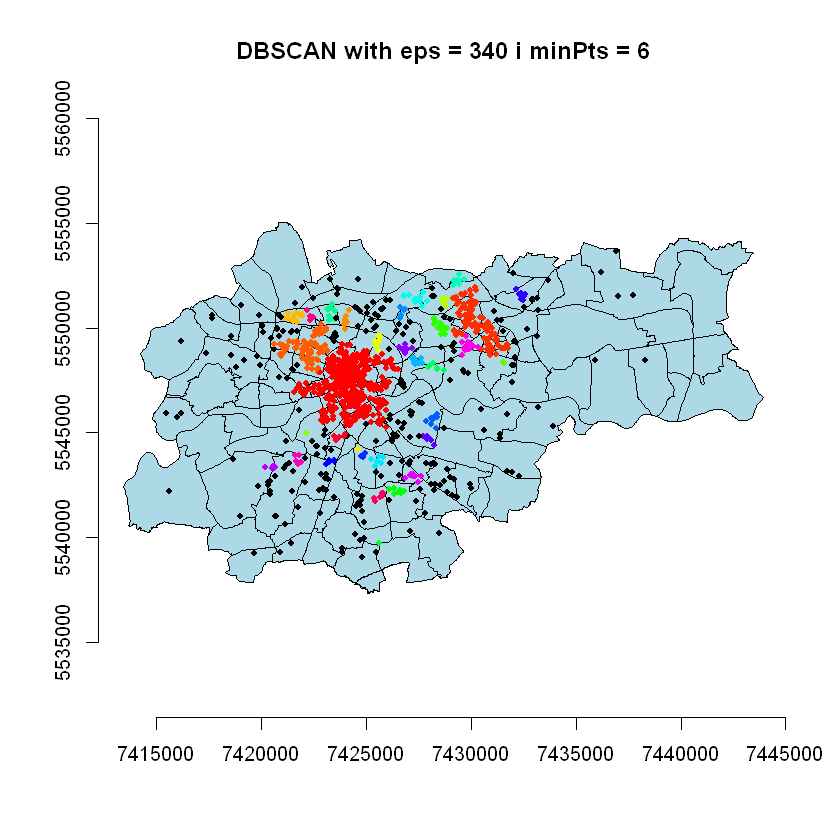

In [15]:
eps_values <- c(200, 330, 220, 320,250,340)  
minPts_values <- c(4, 4, 5,5,6,6)  

punkty1<-punkty

for (i in 1:6) {
  eps1 <- eps_values[i]
  minPts1 <- minPts_values[i]
  
  dbscan_result <- dbscan(st_coordinates(punkty1), eps = eps1, minPts = minPts1)
  
  punkty1$cluster <- dbscan_result$cluster
  
  unique_clusters <- sort(unique(punkty1$cluster)) 
  num_clusters <- length(unique_clusters)
  cluster_colors <- c("black", rainbow(num_clusters - 1)) 

  plot(st_geometry(osiedle), col = "lightblue", border = "black", 
       main = paste("DBSCAN with eps =", eps1, "i minPts =", minPts1))
  

  plot(st_geometry(punkty1), col = cluster_colors[as.numeric(factor(punkty1$cluster))], 
       add = TRUE, pch = 20)


  axis(1)
  axis(2)
}

# HDBSCAN

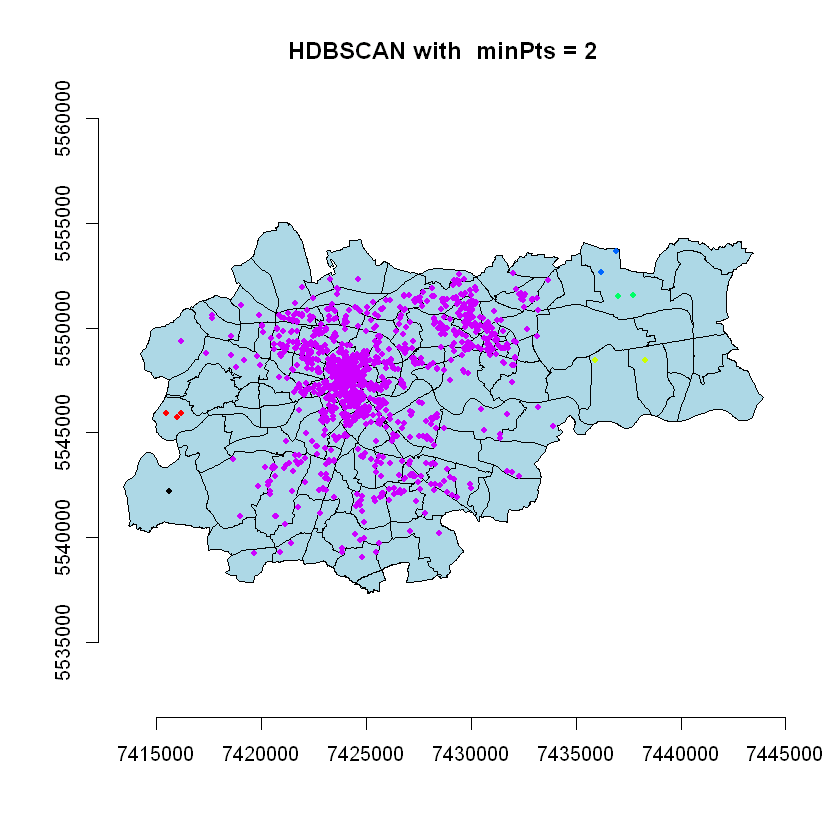

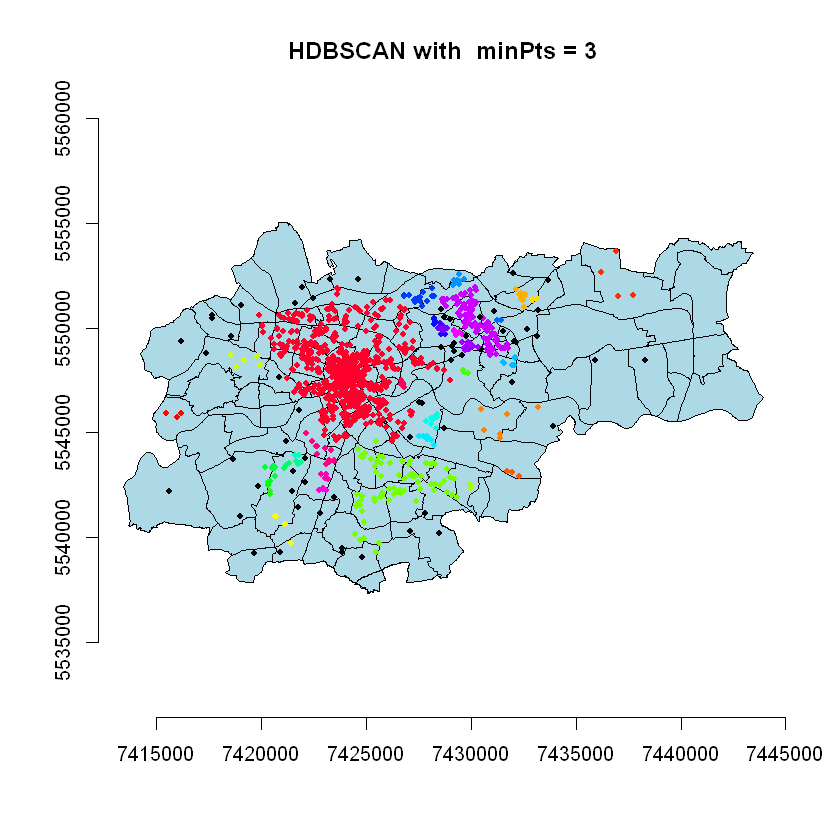

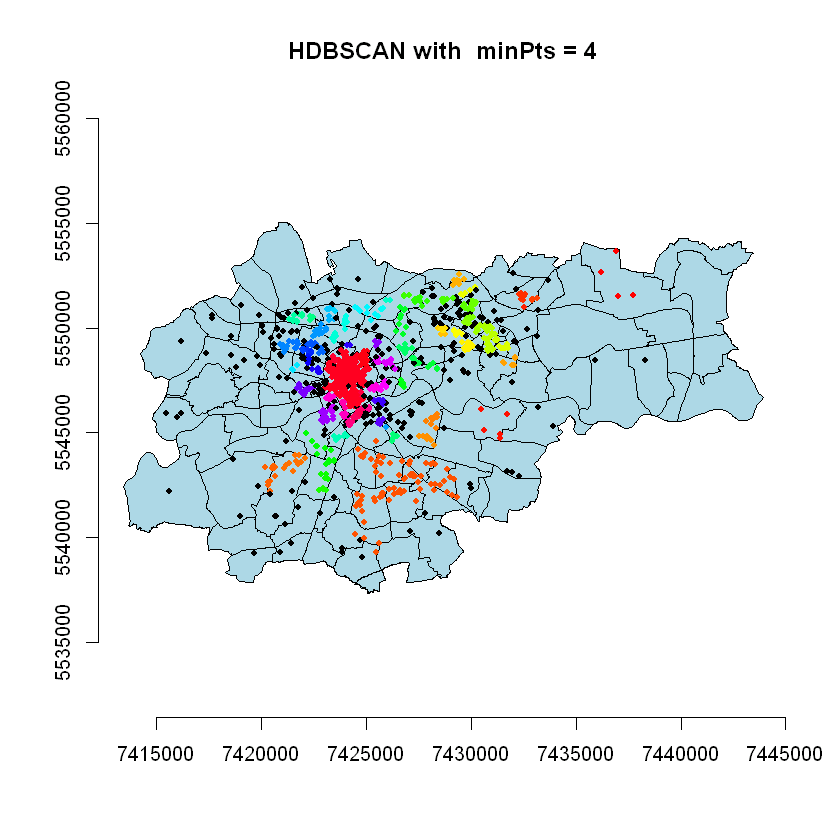

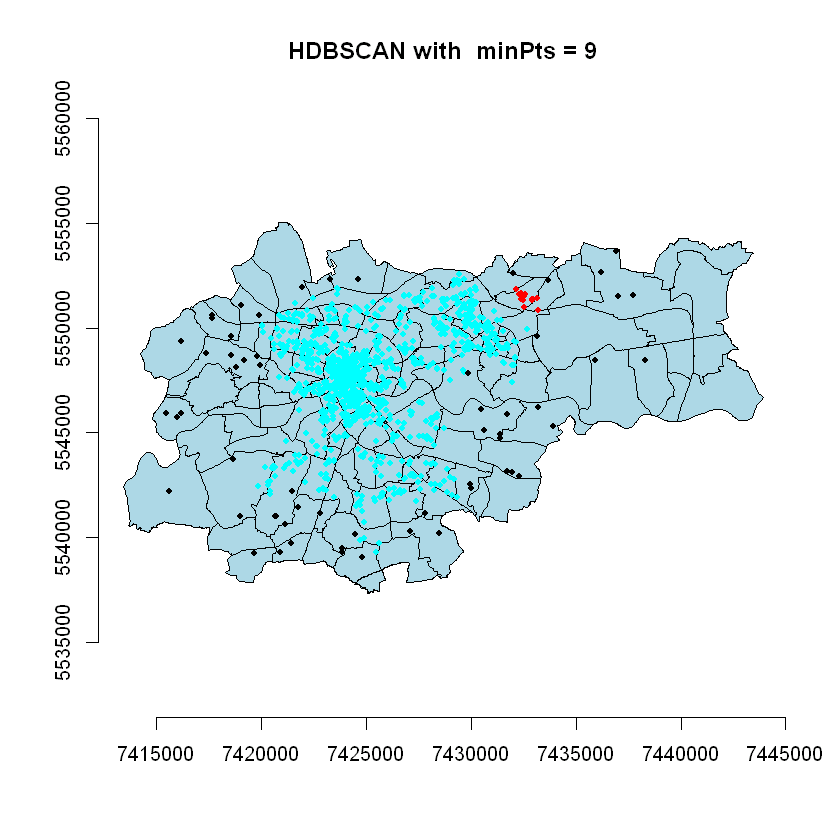

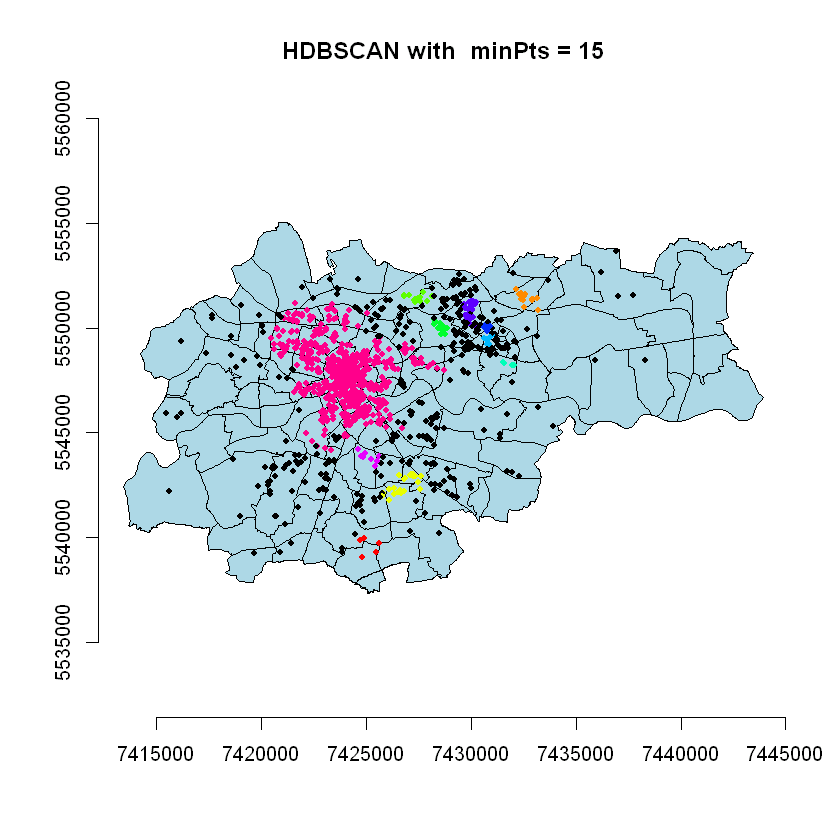

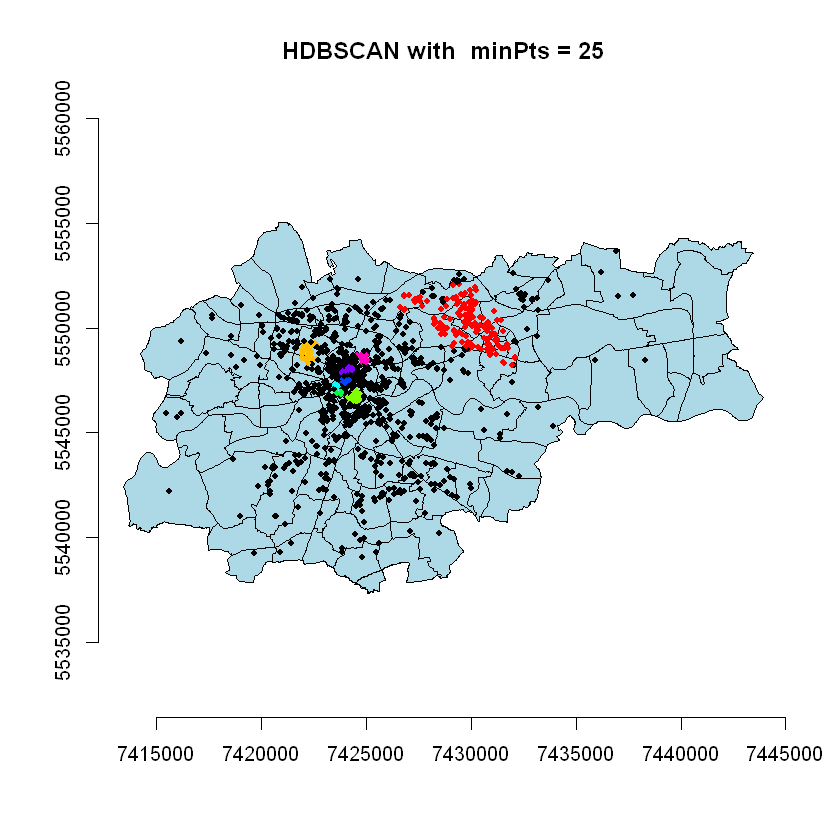

In [16]:
minPts_values_2 <- c(2,3,4, 9,15,25) 
punkty2<-punkty



for (i in 1:6) {
  minPts2 <- minPts_values_2[i]
  
  hdbscan_result <- hdbscan(st_coordinates(punkty2), minPts = minPts2)
  

  punkty2$cluster <- hdbscan_result$cluster
  
  unique_clusters <- sort(unique(punkty2$cluster))
  num_clusters <- length(unique_clusters)
  cluster_colors <- c("black", rainbow(num_clusters - 1))
  
  plot(st_geometry(osiedle), col = "lightblue", border = "black", 
       main = paste("HDBSCAN with  minPts =", minPts2))
  
  plot(st_geometry(punkty2), col = cluster_colors[as.numeric(factor(punkty2$cluster))], 
       add = TRUE, pch = 20)
 
  axis(1)
  axis(2)
}